In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
insurance_dataset=pd.read_csv("insurance.csv")

In [3]:
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Kotha Alekya\AppData\Local\Temp\ipykernel_17468\729474926.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


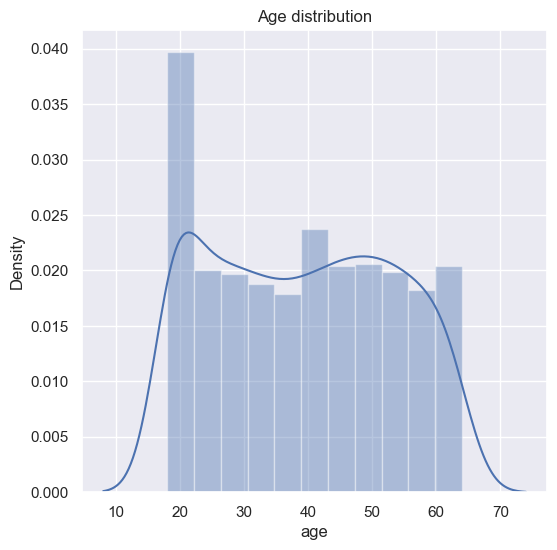

In [11]:

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age distribution")
plt.show()

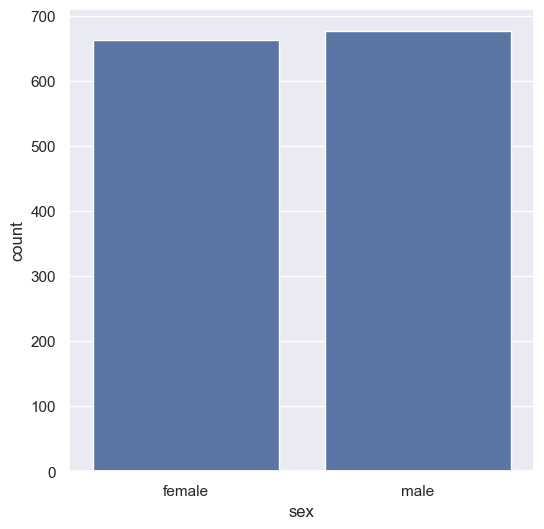

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Kotha Alekya\AppData\Local\Temp\ipykernel_17468\3282093350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


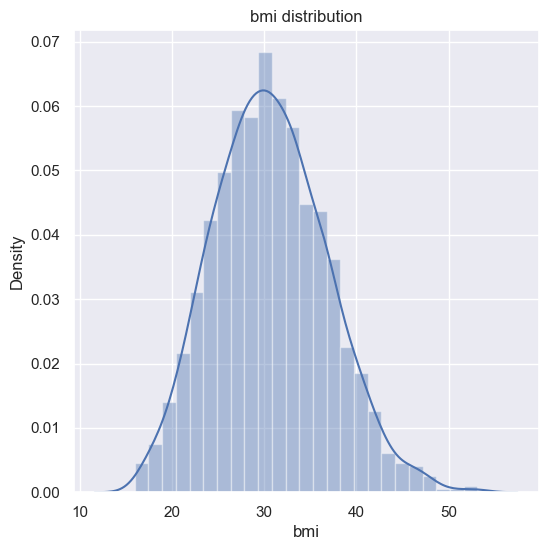

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("bmi distribution")
plt.show()

In [18]:
insurance_dataset.replace({"sex":{'male':0,'female':1}},inplace=True)

C:\Users\Kotha Alekya\AppData\Local\Temp\ipykernel_17468\2113537303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"sex":{'male':0,'female':1}},inplace=True)


In [19]:
insurance_dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,0,33.77,1,no,southeast,1725.5523


In [20]:
insurance_dataset.replace({"smoker":{'yes':0,'no':1}},inplace=True)

C:\Users\Kotha Alekya\AppData\Local\Temp\ipykernel_17468\1910274345.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"smoker":{'yes':0,'no':1}},inplace=True)


In [21]:
insurance_dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,0,southwest,16884.9240
1,18,0,33.77,1,1,southeast,1725.5523


In [30]:
insurance_dataset.replace({"region":{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\Kotha Alekya\AppData\Local\Temp\ipykernel_17468\555612950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"region":{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [31]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [38]:
training_data_prediction=regressor.predict(X_train)

In [39]:
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [40]:
test_data_prediction=regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [41]:
print(r2_test)

0.7447273869684077


In [47]:
input_data=(31,1,25.74,0,1,0)

In [48]:
array=np.asarray(input_data)
reshaped_array=array.reshape(1,-1)
prediction=regressor.predict(reshaped_array)
print(prediction)

[3760.0805765]


C:\Users\Kotha Alekya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
